### Importing the Necessary Libraries

In [1]:
import numpy as np  # NumPy is a library for numerical operations, particularly useful for handling arrays and performing mathematical operations.

import torch  # PyTorch is a deep learning library. It provides tools for creating and training neural networks.

import torchvision  # Torchvision is a library that provides tools for computer vision, including pre-trained models, datasets, and image transformations.

import matplotlib.pyplot as plt  # Matplotlib is a plotting library. It is used to create visualizations like graphs and images.

from time import time  # The 'time' library is used to track time, typically used to measure how long a piece of code takes to run.

from torchvision import datasets, transforms  
# 'datasets' provides access to common image datasets like MNIST, CIFAR-10, etc.
# 'transforms' provides utilities to apply transformations to images, such as resizing, normalizing, or converting to tensor format.

from torch import nn, optim  
# 'nn' stands for Neural Networks and provides modules and classes for building layers, loss functions, etc.
# 'optim' provides optimization algorithms (e.g., Stochastic Gradient Descent, Adam) to update model parameters during training.


### Data Preparation for MNIST Dataset: Transformations, Download, and DataLoader Creation

In [2]:
# Define the transformation (convert to tensor and normalize)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Specify a local directory where you want to save the datasets
local_data_path = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/'

# Download and save the training and test datasets to your local computer
trainset = datasets.MNIST(local_data_path, download=True, train=True, transform=transform)
valset = datasets.MNIST(local_data_path, download=True, train=False, transform=transform)

# Create DataLoader to iterate over the datasets
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:04<00:00, 2322038.74it/s]


Extracting D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw\train-images-idx3-ubyte.gz to D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1352036.32it/s]


Extracting D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw\train-labels-idx1-ubyte.gz to D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 2411354.95it/s]


Extracting D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw\t10k-images-idx3-ubyte.gz to D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw\t10k-labels-idx1-ubyte.gz to D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/MNIST\raw



### Retrieve and Display Batch Dimensions from DataLoade

In [3]:
# Get a batch of data from the training loader

dataiter = iter(trainloader)  # Convert the DataLoader 'trainloader' into an iterator to manually iterate over the data.
images, labels = next(dataiter)  # Get the next batch of images and labels from the iterator.

# Display the shape of the images and labels in the batch

print(images.shape)  # Print the shape of the 'images' tensor (e.g., [batch_size, channels, height, width]).
# For MNIST data, the shape would typically be [batch_size, 1, 28, 28], where 1 is the number of channels (grayscale images).

print(labels.shape)  # Print the shape of the 'labels' tensor, typically [batch_size].
# For example, if the batch size is 64, the shape would be [64], meaning there are 64 labels corresponding to 64 images.


torch.Size([64, 1, 28, 28])
torch.Size([64])


### Display Grayscale Images from the DataLoader Batch 

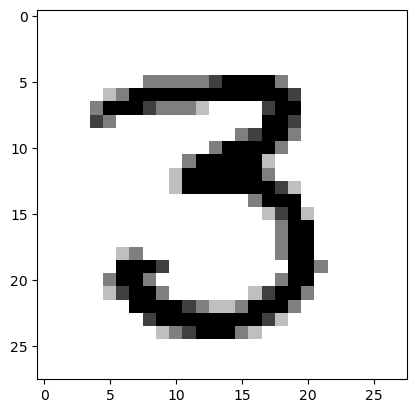

In [4]:
# Diplay the first image
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

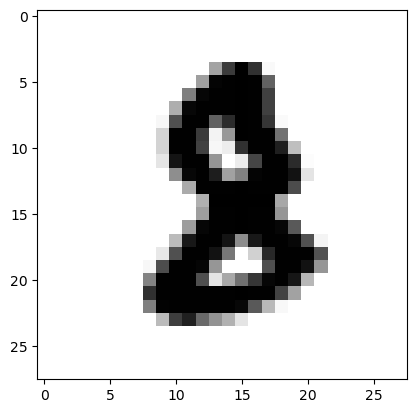

In [5]:
# Dispaly another image
plt.imshow(images[9].numpy().squeeze(), cmap='gray_r');

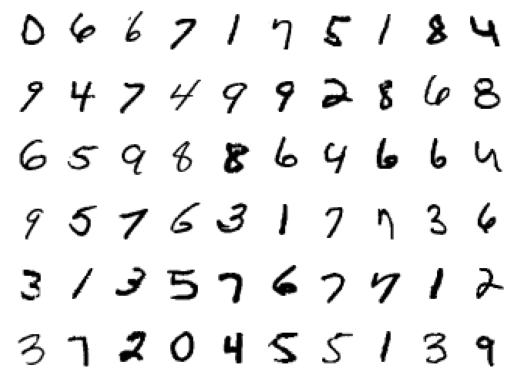

In [6]:
# Display all images in a grid format

figure = plt.figure()  # Create a new figure for displaying the images
num_of_images = 60  # Set the number of images you want to display

# Loop through the first 'num_of_images' images in the batch and display them
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)  # Create a subplot in a 6x10 grid (6 rows and 10 columns)
    plt.axis('off')  # Turn off the axis lines and labels for a cleaner display
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')  # Display the image
    # 'images[index].numpy()' converts the tensor to a NumPy array
    # 'squeeze()' removes the extra dimension (since it's grayscale, the channel is 1)
    # 'cmap='gray_r'' displays the image in inverted grayscale ('gray_r' is a reversed grayscale)


### Build The Neural Network model

In [7]:
# Define the input, hidden, and output sizes of the neural network

input_size = 784  # Input size for each image (28x28 = 784 pixels when flattened into a 1D vector)
hidden_sizes = [128, 64]  # Two hidden layers: the first with 128 neurons, the second with 64 neurons
output_size = 10  # Output size is 10, representing the 10 classes (digits 0-9)

# Define the model using nn.Sequential to stack layers in order

model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),  # First layer: 784 input neurons to 128 output neurons
    nn.ReLU(),  # ReLU activation function for introducing non-linearity
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # Second layer: 128 input neurons to 64 output neurons
    nn.ReLU(),  # ReLU activation function for the second layer
    nn.Linear(hidden_sizes[1], output_size),  # Third layer: 64 input neurons to 10 output neurons (one for each class)
    nn.LogSoftmax(dim=1)  # Log-Softmax function for converting the output to log-probabilities
)

# Print the model architecture
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
criterion = nn.NLLLoss()  # Define the loss function (Negative Log Likelihood Loss)

images, labels = next(iter(trainloader))  # Get a batch of images and labels from the training data

images = images.view(images.shape[0], -1)  # Flatten the images into 1D vectors

logps = model(images)  # Perform a forward pass to get log-probabilities

loss = criterion(logps, labels)  # Calculate the loss between predicted log-probabilities and true labels


### Adjusting Weights

In [9]:
print('Before backward pass: \n', model[0].weight.grad)  # Print the gradients of the first layer before backpropagation (initially None)

loss.backward(retain_graph=True)  # Perform backpropagation and retain the computation graph

print('After backward pass: \n', model[0].weight.grad)  # Print the updated gradients of the first layer after backpropagation


Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0004,  0.0004,  0.0004,  ...,  0.0004,  0.0004,  0.0004],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [ 0.0018,  0.0018,  0.0018,  ...,  0.0018,  0.0018,  0.0018],
        ...,
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


### Core Training Process

In [10]:
import os
import time

# Define the local path where you want to save the loss data
local_data_path = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/'

# Ensure the directory exists, create it if not
if not os.path.exists(local_data_path):
    os.makedirs(local_data_path)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
criterion = nn.NLLLoss()  # Assuming Negative Log Likelihood Loss is used

# Start measuring the training time
time0 = time.time()

# Prepare a list to store loss values for each epoch
loss_values = []

epochs = 15  # Number of epochs to train the model
for e in range(epochs):
    running_loss = 0  # Initialize running loss for each epoch
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-long vector
        images = images.view(images.shape[0], -1)
    
        # Zero the gradients before each pass
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backpropagation
        loss.backward()
        
        # Update the model's weights
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
    
    # Calculate average loss for the epoch and store it
    avg_loss = running_loss / len(trainloader)
    loss_values.append(avg_loss)
    
    # Print training loss for the current epoch
    print(f"Epoch {e} - Training loss: {avg_loss}")

# Save the loss values to a file
loss_file_path = os.path.join(local_data_path, 'loss_values(128,64).txt')

# Write the loss values to the file
with open(loss_file_path, 'w') as f:
    for epoch, loss in enumerate(loss_values):
        f.write(f"Epoch {epoch}: {loss}\n")

# Print the total training time
print(f"\nTraining Time (in minutes) = {(time.time() - time0)/60:.3f} minutes")

# Confirm the loss file is saved
print(f"Loss values saved to: {loss_file_path}")
torch.save(model, local_data_path + 'model_128_64.pt')  # Save the model



Epoch 0 - Training loss: 0.6290354058543629
Epoch 1 - Training loss: 0.28325051936640666
Epoch 2 - Training loss: 0.21407341677496936
Epoch 3 - Training loss: 0.169050921257069
Epoch 4 - Training loss: 0.1399753131309965
Epoch 5 - Training loss: 0.12050687785802493
Epoch 6 - Training loss: 0.1050659438033205
Epoch 7 - Training loss: 0.09388185168967954
Epoch 8 - Training loss: 0.08516997978466549
Epoch 9 - Training loss: 0.0768510851039013
Epoch 10 - Training loss: 0.0683108776289501
Epoch 11 - Training loss: 0.06292942180725208
Epoch 12 - Training loss: 0.05799502679812057
Epoch 13 - Training loss: 0.05351914842945656
Epoch 14 - Training loss: 0.04929202459683058

Training Time (in minutes) = 1.897 minutes
Loss values saved to: D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_values(128,64).txt


### The Correct Prediction of Image

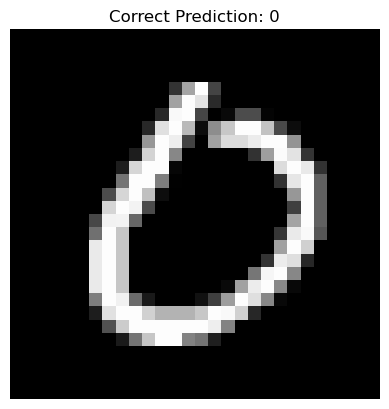

Training Accuracy: 98.82%


In [11]:
correct_count, all_count = 0, 0

# Loop through the training data
for images, labels in trainloader:  # Use 'trainloader' for training data
    images = images.view(images.shape[0], -1)  # Flatten images if necessary

    # Disable gradient calculations since we are in evaluation mode
    with torch.no_grad():
        logps = model(images)  # Get the model's predictions

    # Get the predicted class from the model's output
    ps = torch.exp(logps)
    _, predicted_classes = torch.max(ps, 1)  # Predicted class with highest probability

    # Loop over each image in the batch
    for i in range(len(labels)):
        true_label = labels[i].item()
        pred_label = predicted_classes[i].item()

        if true_label == pred_label:  # If the prediction is correct
            correct_count += 1

            # If you want to save the image with correct predictions, you can do it here:
            if correct_count == 1:  # This saves only the first correct prediction image
                image_to_save = images[i].view(28, 28)  # Reshape the image
                plt.imshow(image_to_save, cmap='gray')
                plt.title(f"Correct Prediction: {pred_label}")
                plt.axis('off')
                plt.savefig('high_accuracy_image.png')  # Save the image as a PNG file
                plt.show()

        all_count += 1

# Calculate and print the overall training accuracy
training_accuracy = correct_count / all_count
print(f"Training Accuracy: {training_accuracy * 100:.2f}%")


### Misclassified Prediction of Image

Training Accuracy: 98.82%
Misclassified Accuracy (i.e., error rate): 1.18%


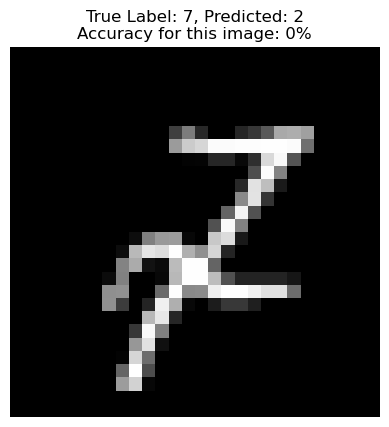

Number of correct predictions: 59291
Number of incorrect predictions: 709
Total images processed: 60000


In [12]:
correct_count, incorrect_count, all_count = 0, 0, 0
misclassified_image = None
misclassified_label = None
predicted_label = None

# Loop through the training data
for images, labels in trainloader:  # Use 'trainloader' for training data
    images = images.view(images.shape[0], -1)  # Flatten images if necessary

    # Disable gradient calculations since we are in evaluation mode
    with torch.no_grad():
        logps = model(images)  # Get the model's predictions

    # Get the predicted class from the model's output
    ps = torch.exp(logps)
    _, predicted_classes = torch.max(ps, 1)  # Predicted class with highest probability

    # Loop over each image in the batch
    for i in range(len(labels)):
        true_label = labels[i].item()
        pred_label = predicted_classes[i].item()

        if true_label == pred_label:  # Correct prediction
            correct_count += 1
        else:  # Incorrect prediction (low accuracy)
            incorrect_count += 1
            if misclassified_image is None:  # Save the first misclassified image
                misclassified_image = images[i].view(28, 28)  # Reshape the image
                misclassified_label = true_label
                predicted_label = pred_label

        all_count += 1  # Total number of images processed

# Calculate the training accuracy (for correct predictions)
training_accuracy = correct_count / all_count * 100  # Convert to percentage
print(f"Training Accuracy: {training_accuracy:.2f}%")

# Calculate the accuracy for incorrect predictions (i.e., the error rate)
misclassified_accuracy = incorrect_count / all_count * 100  # This is basically the error rate
print(f"Misclassified Accuracy (i.e., error rate): {misclassified_accuracy:.2f}%")

# Plot the first misclassified image (low accuracy example)
if misclassified_image is not None:
    plt.imshow(misclassified_image, cmap='gray')
    plt.title(f"True Label: {misclassified_label}, Predicted: {predicted_label}\nAccuracy for this image: 0%")
    plt.axis('off')
    plt.show()
else:
    print("No misclassified images found.")

# Optionally print the number of correct and incorrect classifications
print(f"Number of correct predictions: {correct_count}")
print(f"Number of incorrect predictions: {incorrect_count}")
print(f"Total images processed: {all_count}")


### Testing & Evaluation

Predicted Digit = 7


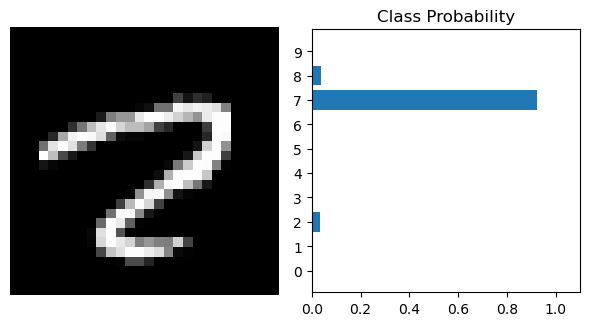

In [13]:
def view_classify(img, ps):
    ''' Function to display an image along with its predicted probabilities. '''
    
    ps = ps.data.numpy().squeeze()  # Convert the predicted probabilities tensor to a NumPy array and remove extra dimensions
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)  # Create a figure with two subplots: one for the image, one for the probabilities
    
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')  # Display the image in grayscale format
    
    ax1.axis('off')  # Turn off the axis for the image display
    
    ax2.barh(np.arange(10), ps)  # Create a horizontal bar chart for the predicted probabilities of each class (0-9)
    
    ax2.set_aspect(0.1)  # Set the aspect ratio for the bar chart
    
    ax2.set_yticks(np.arange(10))  # Set y-axis ticks to represent the 10 possible classes (digits 0-9)
    
    ax2.set_yticklabels(np.arange(10))  # Label each y-axis tick with the corresponding class (digits 0-9)
    
    ax2.set_title('Class Probability')  # Set the title for the bar chart
    
    ax2.set_xlim(0, 1.1)  # Set the x-axis limit for probabilities between 0 and 1.1
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    
    plt.show()  # Display the image and bar chart
    
# Get a batch of images and labels from the validation data
images, labels = next(iter(valloader))

# Flatten the first image in the batch to a 1D tensor
img = images[0].view(1, 784)

# Turn off gradient calculations for efficiency during inference
with torch.no_grad():
    logps = model(img)  # Get the model's log-probabilities for the image

ps = torch.exp(logps)  # Convert log-probabilities to actual probabilities

probab = list(ps.numpy()[0])  # Convert the probabilities to a list for easy manipulation

print("Predicted Digit =", probab.index(max(probab)))  # Print the digit with the highest predicted probability

# Display the image and its predicted class probabilities
view_classify(img.view(1, 28, 28), ps)


### Model Accuracy Evaluation on Validation Dataset

In [14]:
correct_count, all_count = 0, 0  # Initialize counters for correct predictions and total images

# Loop through the validation data loader (valloader)
for images, labels in valloader:
  
  # Loop through each image in the batch
  for i in range(len(labels)):
    
    img = images[i].view(1, 784)  # Flatten each image to a 1D tensor for model input
    
    with torch.no_grad():  # Disable gradient calculation (not needed for inference)
        logps = model(img)  # Get the log-probabilities from the model

    ps = torch.exp(logps)  # Convert log-probabilities to actual probabilities
    
    probab = list(ps.numpy()[0])  # Convert probabilities to a NumPy array and then to a list
    
    pred_label = probab.index(max(probab))  # Get the predicted label (class with the highest probability)
    
    true_label = labels.numpy()[i]  # Convert the true label to a NumPy format
    
    if(true_label == pred_label):  # Compare predicted label with true label
      correct_count += 1  # Increment correct prediction count if prediction matches the true label
    
    all_count += 1  # Increment total image count

# Print the total number of images tested
print("Number Of Images Tested =", all_count)

# Calculate and print the accuracy of the model
print("\nModel Accuracy =", (correct_count/all_count))  # Accuracy = correct predictions / total predictions


Number Of Images Tested = 10000

Model Accuracy = 0.9763


In [15]:
local_data_path = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/' # The specific local path 
torch.save(model, local_data_path + 'mnist_model_128_64neurons.pt')  # Save the model to the specified local path


### The structure of Neural Network for Increasing Neurons in the Hidden Layers

In [16]:
# Define input, output, and new hidden sizes
input_size = 784  # Input size for MNIST images (28x28 pixels)
hidden_sizes = [512, 256]  # Updated number of neurons in the hidden layers
output_size = 10  # Output size (10 classes for digits 0-9)

# Define the model architecture
model = nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),  # First hidden layer with 256 neurons
    nn.ReLU(),  # Activation function
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),  # Second hidden layer with 128 neurons
    nn.ReLU(),  # Activation function
    nn.Linear(hidden_sizes[1], output_size),  # Output layer with 10 neurons (one for each class)
    nn.LogSoftmax(dim=1)  # Log-Softmax for output probabilities
)

# Print the model to verify the architecture
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### Training Process for Increasing Neurons

In [17]:
import os
import time

# Define the local path where you want to save the loss data
local_data_path = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/'

# Ensure the directory exists
if not os.path.exists(local_data_path):
    os.makedirs(local_data_path)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)  # Optimizer
criterion = nn.NLLLoss()  # Assuming you are using Negative Log Likelihood Loss

# Start measuring the training time
time0 = time.time()  # Start measuring the time

# Prepare a list to store loss values for each epoch
loss_values = []

epochs = 15  # Number of epochs
for e in range(epochs):
    running_loss = 0  # Initialize running loss for each epoch
    for images, labels in trainloader:
        # Flatten MNIST images into a 784-long vector
        images = images.view(images.shape[0], -1)
    
        # Zero the gradients before the forward pass
        optimizer.zero_grad()
        
        # Forward pass
        output = model(images)
        loss = criterion(output, labels)
        
        # Backpropagation
        loss.backward()
        
        # Optimize the model's weights
        optimizer.step()
        
        # Accumulate the running loss
        running_loss += loss.item()
    
    # Calculate average loss for the epoch and store it
    avg_loss = running_loss / len(trainloader)
    loss_values.append(avg_loss)

    # Print the training loss for each epoch (starting from 0)
    print(f"Epoch {e} - Training loss: {avg_loss}")

# Save the loss values to a file with a different name
loss_file_path = os.path.join(local_data_path, 'loss_values(512,256).txt')

# Write the loss values to the file
with open(loss_file_path, 'w') as f:
    for epoch, loss in enumerate(loss_values):
        f.write(f"Epoch {epoch}: {loss}\n")

# Print the total training time
print(f"\nTraining Time (in minutes) = {(time.time() - time0)/60:.3f} minutes")

# Confirm the loss file is saved
print(f"Loss values for increased neurons saved to: {loss_file_path}")
torch.save(model, local_data_path + 'model_512_256.pt')  # Save the model



Epoch 0 - Training loss: 0.5879676544240543
Epoch 1 - Training loss: 0.2672061283848306
Epoch 2 - Training loss: 0.20051063937164826
Epoch 3 - Training loss: 0.1575592582338432
Epoch 4 - Training loss: 0.12865003073282205
Epoch 5 - Training loss: 0.10731574755086541
Epoch 6 - Training loss: 0.09279263463181092
Epoch 7 - Training loss: 0.08023400294648082
Epoch 8 - Training loss: 0.0699379245918403
Epoch 9 - Training loss: 0.062327520777113926
Epoch 10 - Training loss: 0.05628956098040975
Epoch 11 - Training loss: 0.05004789013646917
Epoch 12 - Training loss: 0.04503068881559132
Epoch 13 - Training loss: 0.040924646157417886
Epoch 14 - Training loss: 0.03794605532032586

Training Time (in minutes) = 2.368 minutes
Loss values for increased neurons saved to: D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_values(512,256).txt


### The comparison of traning accuracy for two models

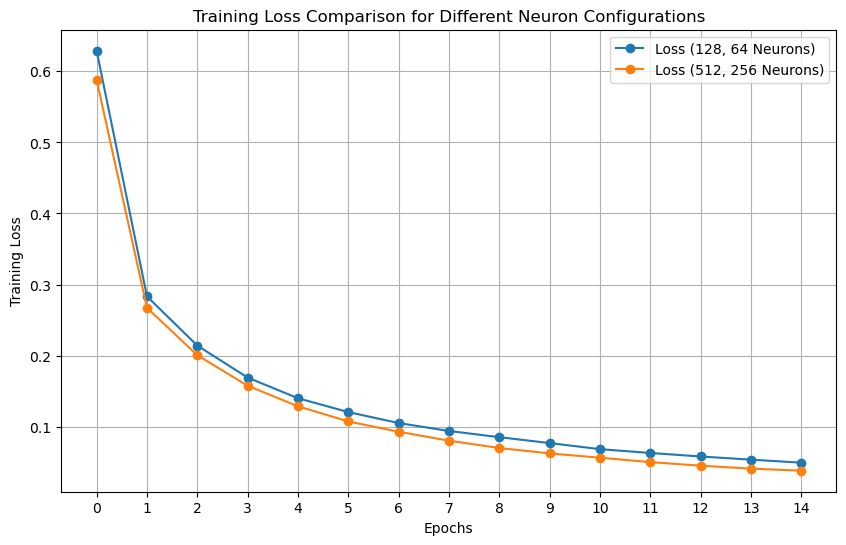

The plot has been saved as a PDF at: D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_comparison_plot.pdf


In [18]:
# Define the paths to the loss value files
loss_file_path_128_64 = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_values(128,64).txt'
loss_file_path_512_256 = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_values(512,256).txt'

# Function to read loss values from a file
def read_loss_values(file_path):
    loss_values = []
    with open(file_path, 'r') as f:
        for line in f:
            epoch, loss = line.strip().split(': ')
            loss_values.append(float(loss))  # Convert loss from string to float
    return loss_values

# Read loss values from both files
loss_values_128_64 = read_loss_values(loss_file_path_128_64)
loss_values_512_256 = read_loss_values(loss_file_path_512_256)

# Plotting the loss values for comparison
epochs = range(len(loss_values_128_64))  # Assuming both files have the same number of epochs

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values_128_64, label="Loss (128, 64 Neurons)", marker='o')
plt.plot(epochs, loss_values_512_256, label="Loss (512, 256 Neurons)", marker='o')
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison for Different Neuron Configurations")
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # Set x-ticks to match the number of epochs

# Save the result in PDF format
output_pdf_path = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/loss_comparison_plot.pdf'
plt.savefig(output_pdf_path)
plt.show()

print(f"The plot has been saved as a PDF at: {output_pdf_path}")


Predicted Digit: 1, True Label: 1 - High accuracy!


C:\Users\Roja\AppData\Local\Temp\ipykernel_7984\2419200914.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('D:/USC_Course/CSCE 790 Section 007 Neural 

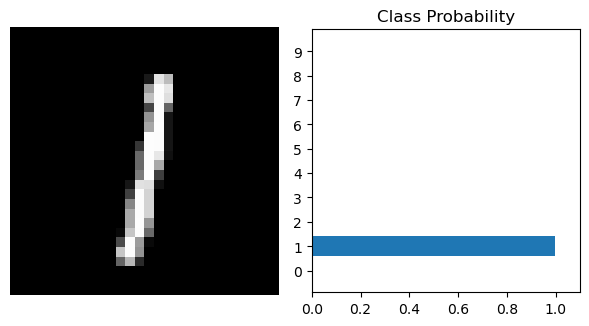

In [19]:
# Load the model with increased neurons
model = torch.load('D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/model_512_256.pt')

# Function to display an image along with its predicted probabilities
def view_classify(img, ps):
    ''' Function to display an image along with its predicted probabilities. '''
    ps = ps.data.numpy().squeeze()  # Convert to NumPy array
    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')  # Display the image
    ax1.axis('off')  # Turn off the axis
    ax2.barh(np.arange(10), ps)  # Create a horizontal bar chart for class probabilities
    ax2.set_aspect(0.1)  # Set aspect ratio for bar chart
    ax2.set_yticks(np.arange(10))  # Set y-ticks for classes
    ax2.set_yticklabels(np.arange(10))  # Label y-ticks with class numbers
    ax2.set_title('Class Probability')  # Set title for probabilities
    ax2.set_xlim(0, 1.1)  # Set x-axis limit

    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot

# Get a batch of validation data
images, labels = next(iter(valloader))

# Select an image from the batch
img = images[0].view(1, 784)  # Flatten the image for input to the model

# Perform a forward pass without calculating gradients
with torch.no_grad():
    logps = model(img)  # Get the log-probabilities

# Convert log-probabilities to actual probabilities
ps = torch.exp(logps)

# Get the predicted class (digit) with the highest probability
pred_label = ps.argmax(dim=1).item()  # Get the index of the highest probability

# Get the true label for comparison
true_label = labels[0].item()  # Get the true label for the selected image

# Check if the prediction is correct (high accuracy)
if pred_label == true_label:
    print(f"Predicted Digit: {pred_label}, True Label: {true_label} - High accuracy!")
else:
    print(f"Predicted Digit: {pred_label}, True Label: {true_label} - Misclassified.")

# Display the image and its predicted probabilities
view_classify(img.view(1, 28, 28), ps)


C:\Users\Roja\AppData\Local\Temp\ipykernel_7984\3476196663.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_128_64 = torch.load('D:/USC_Course/CSCE 790 Section 007 

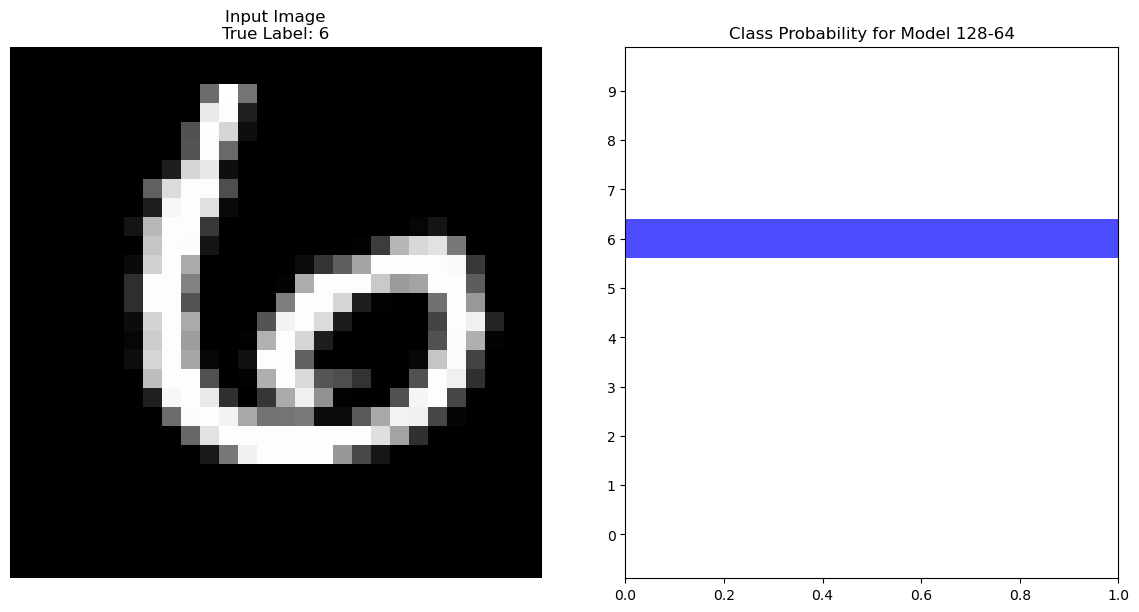

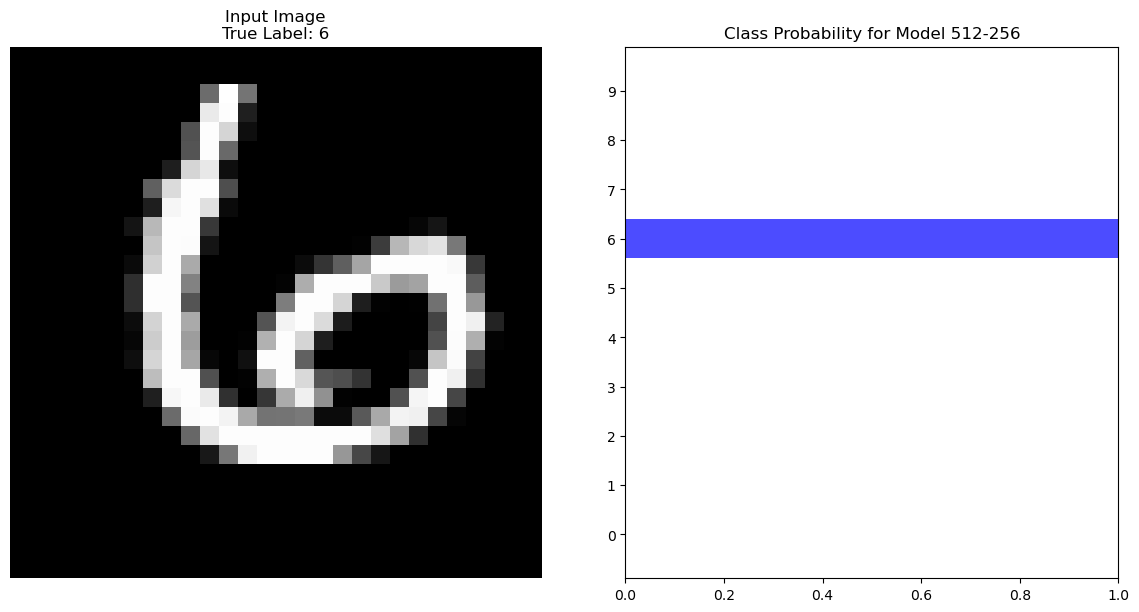

In [22]:
# Load the models
model_128_64 = torch.load('D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/model_128_64.pt')
model_512_256 = torch.load('D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/model_512_256.pt')

# Specify a directory to save the images
save_directory = 'D:/USC_Course/CSCE 790 Section 007 Neural Networks and Their Applications/MNIST_Datasets/results/'
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Function to display an image and its predicted probabilities
def view_image_and_predictions(img, ps, model_name, true_label, index):
    ''' Function to display an image along with its predicted probabilities and save the figure as PDF. '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display the image
    axes[0].imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='gray')
    axes[0].axis('off')
    axes[0].set_title(f'Input Image\nTrue Label: {true_label}')

    # Bar chart for model predictions
    axes[1].barh(np.arange(10), ps, color='blue', alpha=0.7)
    axes[1].set_aspect(0.1)
    axes[1].set_yticks(np.arange(10))
    axes[1].set_yticklabels(np.arange(10))
    axes[1].set_title(f'Class Probability for {model_name}')
    axes[1].set_xlim(0, 1)

    plt.tight_layout()

    # Save the figure as PDF
    plt.savefig(os.path.join(save_directory, f'{model_name}_predictions_{index}.pdf'))
    plt.show()

# Get a batch of validation data
images, labels = next(iter(valloader))

# Select a specific image (you can change this index)
image_index = 0  # Modify this to select a different image
img = images[image_index]
true_label = labels[image_index].item()  # True label of the selected image

# Flatten the image for model input
img_flat = img.view(1, 784)

# Perform inference with the first model (128-64)
with torch.no_grad():
    logps_128_64 = model_128_64(img_flat)  # Get the log-probabilities
ps_128_64 = torch.exp(logps_128_64)  # Convert log-probabilities to actual probabilities

# Display the same image and its predictions from the first model
view_image_and_predictions(img, ps_128_64.numpy()[0], 'Model 128-64', true_label, image_index)

# Perform inference with the second model (512-256)
with torch.no_grad():
    logps_512_256 = model_512_256(img_flat)  # Get the log-probabilities
ps_512_256 = torch.exp(logps_512_256)  # Convert log-probabilities to actual probabilities

# Display the same image and its predictions from the second model
view_image_and_predictions(img, ps_512_256.numpy()[0], 'Model 512-256', true_label, image_index)
